In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')
print(data.head())
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [3]:
data=data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first=True)

In [4]:
X=data.drop('price',axis=1)
y=data['price']

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3)

In [12]:
sgd_model.fit(X_train,y_train)
y_pred=sgd_model.predict(X_test)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print('Name: KRITHIKAA P ')
print('Reg. No: 212225040193')

print(f"MSE: {mean_squared_error(y_test,y_pred):.2f}")
print(f"R^2: {r2_score(y_test,y_pred):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred):.2f}")

Name: KRITHIKAA P 
Reg. No: 212225040193
MSE: 0.21
R^2: 0.8282
MAE: 0.32


In [16]:
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)


Model Coefficients:
Coefficients: [ 0.0352415   0.10592589  0.01238294  0.17776903  0.02006553  0.17004671
  0.28330571 -0.01557523 -0.08083117  0.00306296  0.10563967  0.03486557
 -0.03921159 -0.04506932 -0.01788424  0.02263361  0.01872784 -0.01526627
 -0.08809251 -0.01360147 -0.09266358 -0.03170407  0.06489927  0.21130391
  0.01321469 -0.09924679  0.07308814 -0.01726409  0.00413844  0.00935417
 -0.03176952 -0.14483909 -0.07188282  0.00078574 -0.0254463   0.00935417
 -0.00386851 -0.0141487   0.01788424 -0.01772415 -0.03190589 -0.04062794
 -0.01666868]
Intercept: [-0.01122599]


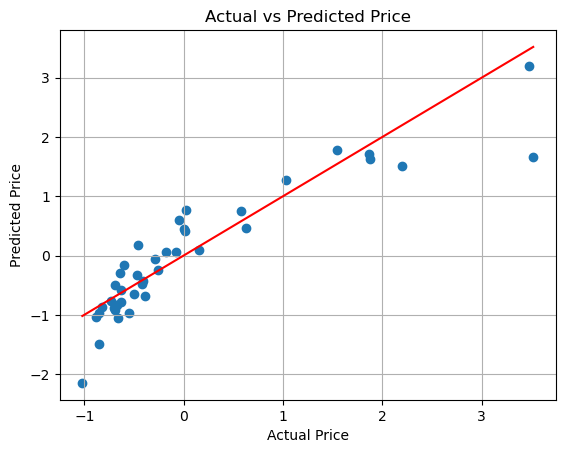

In [18]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.grid(True)
plt.show()